In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from xgboost import XGBClassifier, plot_importance
#np.random.seed(123)
warnings.filterwarnings('ignore')
%matplotlib inline

In [18]:
# Import data
train_data = pd.read_csv('Train_v2.csv')
test_data = pd.read_csv('Test_v2.csv')
submission = pd.read_csv('SubmissionFile.csv')


In [19]:
# print shape
print('train data shape :', train_data.shape)
print('test data shape :', test_data.shape)
print('test data shape :', submission.shape)


train data shape : (23524, 13)
test data shape : (10086, 12)
test data shape : (10086, 2)


In [20]:
# inspect train data.
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [21]:

# Check for missing values
print('missing values:', train_data.isnull().sum())

missing values: country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64


In [22]:
print(train_data.isnull().values.any())

False


In [23]:
# counting the number of misssing values
train_data.isnull().sum()


country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

There are no missing values

In [24]:
 #show Some information about the dataset
 print(train_data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
country                   23524 non-null object
year                      23524 non-null int64
uniqueid                  23524 non-null object
bank_account              23524 non-null object
location_type             23524 non-null object
cellphone_access          23524 non-null object
household_size            23524 non-null int64
age_of_respondent         23524 non-null int64
gender_of_respondent      23524 non-null object
relationship_with_head    23524 non-null object
marital_status            23524 non-null object
education_level           23524 non-null object
job_type                  23524 non-null object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB
None


In [25]:
print(np.min(train_data['household_size']))

1


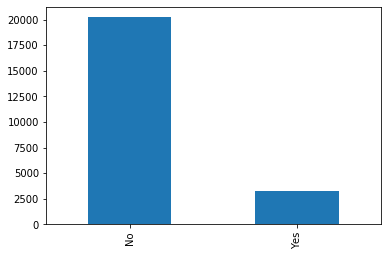

In [26]:
train_data.bank_account.value_counts().plot(kind='bar')

In [27]:
# Import label encoder 
from sklearn import preprocessing 

# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder() 
  
# Encode labels in column 'species'. 
train_data['bank_account']= label_encoder.fit_transform(train_data['bank_account']) 
train_data['cellphone_access']= label_encoder.fit_transform(train_data['cellphone_access']) 
train_data['cellphone_access']

X_train = train_data.drop(['bank_account'], axis=1)
Y_train = train_data['bank_account']

#print ytrain
Y_train

0        1
1        0
2        1
3        0
4        0
        ..
23519    0
23520    0
23521    0
23522    0
23523    0
Name: bank_account, Length: 23524, dtype: int64

In [28]:
train_data['year_'] = train_data['year']
test_data['year_'] = test_data['year']
# Convert the following numerical labels from integer to float
float_array = train_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)
float_array = test_data[['household_size', 'age_of_respondent', 'year_']].values.astype(float)


In [29]:
# Data preprocessing 
# convert categorical features to numerical features
# categorical features to be converted by One Hot Encoding
train_data['country_'] = train_data['country']
test_data['country_'] = test_data['country']

categ = ['relationship_with_head', 'marital_status', 'education_level', 'job_type', 'country_']
# One Hot Encoding conversion
train_data = pd.get_dummies(train_data, prefix_sep='_', columns = categ)

test_data = pd.get_dummies(test_data, prefix_sep='_', columns = categ)

# Labelncoder conversion
train_data['location_type'] = label_encoder.fit_transform(train_data['location_type'])
train_data['cellphone_access'] = label_encoder.fit_transform(train_data['cellphone_access'])
train_data['gender_of_respondent'] = label_encoder.fit_transform(train_data['gender_of_respondent'])


test_data['location_type'] = label_encoder.fit_transform(test_data['location_type'])
test_data['cellphone_access'] = label_encoder.fit_transform(test_data['cellphone_access'])
test_data['gender_of_respondent'] = label_encoder.fit_transform(test_data['gender_of_respondent'])


train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [30]:
#Separate training features from target
X_train = train_data.drop(['year', 'uniqueid', 'bank_account', 'country'], axis=1)
y_train = train_data['bank_account']

X_test = test_data.drop(['year', 'uniqueid', 'country'], axis=1)

#rescale X_train and X_test
# import MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

#scaler = MinMaxScaler(feature_range=(0, 1))
#X_train_rescaled = scaler.fit_transform(X_train)
#X_test_rescaled = scaler.fit_transform(X_test)

In [31]:
from sklearn.linear_model import LogisticRegression,LinearRegression

from sklearn.neighbors import KNeighborsClassifier

In [32]:
classifiers = {
    "LogisiticRegression": LogisticRegression(),
    "KNearest": KNeighborsClassifier(),
    #"LinearRegression": LinearRegression(),
    "XGboost":XGBClassifier(), 
    
}

In [33]:
logmodel = LogisticRegression()
KNearest = KNeighborsClassifier()
XGboost  = XGBClassifier()

In [34]:
train_data.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,year_,...,job_type_Government Dependent,job_type_Informally employed,job_type_No Income,job_type_Other Income,job_type_Remittance Dependent,job_type_Self employed,country__Kenya,country__Rwanda,country__Tanzania,country__Uganda
0,Kenya,2018,uniqueid_1,1,0,1,3,24,0,2018,...,0,0,0,0,0,1,1,0,0,0
1,Kenya,2018,uniqueid_2,0,0,0,5,70,0,2018,...,1,0,0,0,0,0,1,0,0,0
2,Kenya,2018,uniqueid_3,1,1,1,5,26,1,2018,...,0,0,0,0,0,1,1,0,0,0
3,Kenya,2018,uniqueid_4,0,0,1,5,34,0,2018,...,0,0,0,0,0,0,1,0,0,0
4,Kenya,2018,uniqueid_5,0,1,0,8,26,1,2018,...,0,1,0,0,0,0,1,0,0,0


In [46]:
X_train.shape

(23524, 37)

In [47]:
# Split train_data
from sklearn.model_selection import train_test_split

X_Train, X_val, y_Train, y_val = train_test_split(X_train, y_train, stratify = y_train, test_size = 0.2, random_state=42)

In [37]:
from sklearn.model_selection import cross_val_score


for key, classifier in classifiers.items():
    classifier.fit(X_train, Y_train)
    training_score = cross_val_score(classifier, X_train, Y_train, cv=5)
    print("Classifiers: ", classifier.__class__.__name__, "Has a training score of",
          round(training_score.mean(), 2) * 100, "% accuracy score")

Classifiers:  LogisticRegression Has a training score of 83.0 % accuracy score
Classifiers:  KNeighborsClassifier Has a training score of 81.0 % accuracy score
Classifiers:  XGBClassifier Has a training score of 82.0 % accuracy score


In [38]:
logmodel.fit(X_train, Y_train)
KNearest.fit(X_train, Y_train)
XGboost.fit(X_train, Y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [48]:

predictions = logmodel.predict(X_test)

In [49]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [50]:
#import XGBClassifier
from xgboost import XGBClassifier, plot_importance
#from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

my_model = XGBClassifier()
# Import GridSearchCV

# Optimize model paramaters 
param_grid = {'min_child_weight': [1, 5, 10],
        'gamma': [0.5, 1, 1.5, 2, 5],
        'subsample': [0.6, 0.8, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
#my_model2 = GridSearchCV(my_model, param_grid)
#my_model2.fit(X_Train, y_Train)
#print(my_model2.best_params_)

In [51]:
from sklearn.metrics import confusion_matrix, accuracy_score

# fit and Evaluate model
my_model3 = XGBClassifier(min_child_weight = 5, gamma = 0.5, subsample = 0.6, colsample_bytree = 0.6, max_depth = 5)
my_model3.fit(X_Train, y_Train)
y_pred = my_model3.predict(X_val)

# Get error rate
print("Error rate of Random Forest classifier: ", 1 - accuracy_score(y_val, y_pred))

# Get confusion matrix
confusion_matrix(y_pred, y_val)

Error rate of Random Forest classifier:  0.11137088204038259


array([[3917,  398],
       [ 126,  264]])

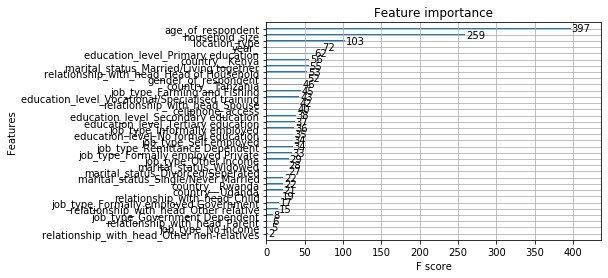

In [52]:
plot_importance(my_model3)
#Enlarge the figure size. 

In [53]:
# Get the predicted result for the test Data
test_data.bank_account = my_model3.predict(X_test)

In [ ]:
# create submission DataFrame
my_submission = pd.DataFrame({"uniqueid": test_data["uniqueid"] + " x " + test_data["country"],

"bank_account": predictions})

In [ ]:
my_submission

In [ ]:
# Create submission csv file
my_submission.to_csv('mysubmission.csv', index = False)

In [ ]:
d = pd.read_csv('mysubmission.csv')

In [ ]:
d